In [1]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/project/archive.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
import tensorflow as tf

In [ ]:
model_0 = tf.keras.models.load_model("/content/drive/MyDrive/project/model_0")
model_1 = tf.keras.models.load_model("/content/drive/MyDrive/project/model_1")
model_2_1 = tf.keras.models.load_model("/content/drive/MyDrive/project/model_2_1")
model_2_2 = tf.keras.models.load_model("/content/drive/MyDrive/project/model_2_2")
model_2_3 = tf.keras.models.load_model("/content/drive/MyDrive/project/model_2_3")
model_3 = tf.keras.models.load_model("/content/drive/MyDrive/project/model_3")
model_3N = tf.keras.models.load_model("/content/drive/MyDrive/project/model_3N")
model_4 = tf.keras.models.load_model("/content/drive/MyDrive/project/model_4")
model_5 = tf.keras.models.load_model("/content/drive/MyDrive/project/model_5")

In [5]:
model_6 = tf.keras.models.load_model("/content/drive/MyDrive/project/model_6")
model_7 = tf.keras.models.load_model("/content/drive/MyDrive/project/model_7")
model_8 = tf.keras.models.load_model("/content/drive/MyDrive/project/model_8")
model_9 = tf.keras.models.load_model("/content/drive/MyDrive/project/model_9")
model_10 = tf.keras.models.load_model("/content/drive/MyDrive/project/model_10")

In [6]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/asl_alphabet_train/asl_alphabet_train", 
    label_mode='categorical', 
    image_size=(200, 200), 
    seed=42, 
    validation_split=0.2,
    subset="validation", 
)

Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


In [7]:
len(test_data)

544

In [8]:
eval_0 = model_0.evaluate(test_data)
eval_1 = model_1.evaluate(test_data)
eval_2_1 = model_2_1.evaluate(test_data)
eval_2_2 = model_2_2.evaluate(test_data)
eval_2_3 = model_2_3.evaluate(test_data)
eval_3 = model_3.evaluate(test_data)
eval_3N = model_3N.evaluate(test_data) 
eval_4 = model_4.evaluate(test_data) 
eval_5 = model_5.evaluate(test_data) 
eval_6 = model_6.evaluate(test_data) 
eval_7 = model_7.evaluate(test_data) 
eval_8 = model_8.evaluate(test_data) 
eval_9 = model_9.evaluate(test_data) 
eval_10 = model_10.evaluate(test_data) 

544/544 [==============================] - 33s 58ms/step - loss: 0.2888 - accuracy: 0.9629


* model_0: A simple ANN with 1 input layer, two dense layers and 1 output layer (training size: 69600 images)
* model_1: adding more layers to model_0 (training size: 69600 images)
* model_2_1: same as model_1 but with tanh activation function and SGD optimizer (training size: 69600 images)
* model_2_2: same as model_1 but with tanh activation function and Adam optimizer (training size: 69600 images)
* model_2_2: same as model_1 but with tanh activation function and Adam optimizer (training size: 69600 images)
* model_2_3: same as model_1 but with sigmoid activation function and Adam optimizer (training size: 69600 images)
* model_3: Adding convolution and pooling layers to model_1 (training size: 69600 images)
* model_3N: same as model_3 but with normalized train data (training size: 69600 images)
* model_4: adjusting some layers in model_3N (training size: 69600 images)
* model_5: Transfer Learning using efficientnetb0
only feature extraction (training size: 69600 images) 
* model_6: Transfer Learning using resnet50v2
only feature extraction (training size: 69600 images)
* model_7: fine-tuning model_6 (training size: 69600 images)
* model_8: same as model_5 but with 50% less train data (training size: 34800 images)
* model_9: same as model_5 but with 25% of train data (training size: 17400 images)
* model_10: same as model_5 but with %10 of train data (training size: 6960 images)


In [12]:
import pandas as pd
df = pd.DataFrame()

In [13]:
df['models'] = [
    'model_0', 'model_1', 'model_2_1', 
    'model_2_2', 'model_2_3', 'model_3', 
    'model_3N', 'model_4', 'model_5', 
    'model_6', 'model_7', 'model_8', 
    'model_9', 'model_10'
]

In [15]:
df['accuracy'] = [
    eval_0[1], eval_1[1], eval_2_1[1], 
    eval_2_2[1], eval_2_3[1], eval_3[1], 
    eval_3N[1], eval_4[1], eval_5[1], 
    eval_6[1], eval_7[1], eval_8[1], 
    eval_9[1], eval_10[1]
]

In [17]:
df['loss'] = [
    eval_0[0], eval_1[0], eval_2_1[0], 
    eval_2_2[0], eval_2_3[0], eval_3[0], 
    eval_3N[0], eval_4[0], eval_5[0], 
    eval_6[0], eval_7[0], eval_8[0], 
    eval_9[0], eval_10[0]
]

### Comparing all 14 models

In [19]:
df

,models,accuracy,loss
0,model_0,0.387931,1.726773
1,model_1,0.727874,0.837054
2,model_2_1,0.739655,0.819177
3,model_2_2,0.470345,1.635180
4,model_2_3,0.596954,1.177334
5,model_3,0.925345,0.237463
6,model_3N,0.955862,0.128170
7,model_4,0.967701,0.099630
8,model_5,0.999368,0.006205
9,model_6,0.995690,0.021492


In [28]:
df.to_csv('comparing14models.csv')

### picking the best 3 models

In [21]:
df.nlargest(3, ['accuracy'])

,models,accuracy,loss
8,model_5,0.999368,0.006205
9,model_6,0.995690,0.021492
10,model_7,0.995690,0.021492


In [22]:
df.nsmallest(3, ['loss'])

,models,accuracy,loss
8,model_5,0.999368,0.006205
9,model_6,0.995690,0.021492
10,model_7,0.995690,0.021492


### Evaluating the model_5 (best model so far....)

In [27]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/asl_alphabet_train/asl_alphabet_train", 
    label_mode='categorical', 
    image_size=(200, 200), 
    shuffle=False 
)

Found 87000 files belonging to 29 classes.


In [29]:
y_labels = []
for images, labels in data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [30]:
pred_probs = model_5.predict(data, verbose=1)

2719/2719 [==============================] - 139s 51ms/step


In [33]:
pred_probs[:3]

array([[9.99891520e-01, 6.25057228e-10, 1.20192589e-09, 2.68104332e-12,
        1.19149536e-06, 1.46562547e-12, 8.73722428e-09, 1.18602621e-12,
        1.06269408e-06, 2.29105901e-11, 2.91559249e-10, 5.55209958e-08,
        1.02055805e-04, 8.93700225e-09, 6.59075425e-08, 5.41743096e-14,
        1.05057564e-14, 4.34459101e-11, 1.00544605e-06, 2.36138908e-06,
        4.38292125e-10, 4.93494460e-13, 1.66556595e-14, 6.86375586e-07,
        1.30443178e-09, 1.98741770e-08, 2.56052335e-09, 2.61730623e-14,
        9.96665195e-10],
       [9.99986768e-01, 1.03787465e-10, 1.86452476e-09, 1.27598301e-12,
        4.13986896e-07, 2.78391633e-12, 5.36890177e-09, 3.56077662e-13,
        2.98770395e-08, 1.51263388e-12, 1.66752324e-11, 4.97201835e-09,
        1.19295673e-05, 4.12487156e-10, 1.82122264e-08, 2.99660224e-15,
        3.19746827e-15, 2.62826414e-12, 5.66746010e-08, 1.18597818e-07,
        2.69312940e-11, 8.74327357e-13, 2.38271914e-15, 4.94660696e-07,
        1.11939313e-09, 1.82410123e-08,

In [32]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00      3000
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      3000
           4       1.00      1.00      1.00      3000
           5       1.00      1.00      1.00      3000
           6       1.00      1.00      1.00      3000
           7       1.00      1.00      1.00      3000
           8       1.00      1.00      1.00      3000
           9       1.00      1.00      1.00      3000
          10       1.00      1.00      1.00      3000
          11       1.00      1.00      1.00      3000
          12       1.00      1.00      1.00      3000
          13       1.00      1.00      1.00      3000
          14       1.00      1.00      1.00      3000
          15       1.00      1.00      1.00      3000
          16       1.00      1.00      1.00      3000
          17       1.00    

In [36]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_mat = confusion_matrix(y_labels, pred_classes)

In [39]:
from seaborn import heatmap

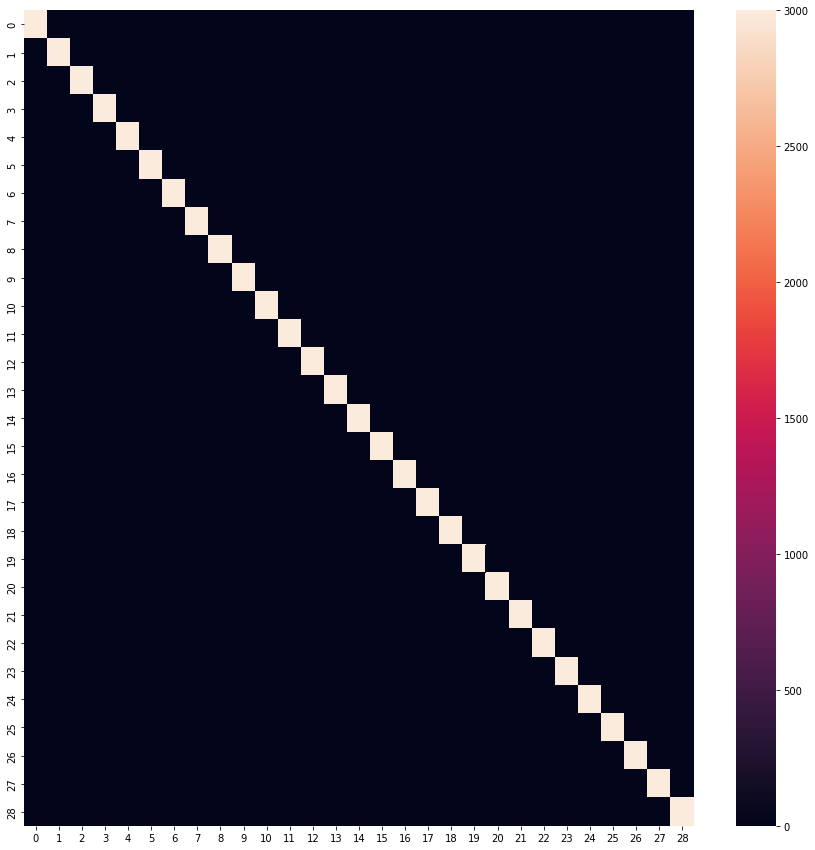

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
heatmap(confusion_mat, ax=ax)

In [ ]:
!pip install wandb

In [51]:
!wandb login
from wandb.keras import WandbCallback
import wandb
wandb.init(project="project_efficientnetb0")

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: chandu_ (c01). Use `wandb login --relogin` to force relogin


In [52]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/asl_alphabet_train/asl_alphabet_train", 
    label_mode='categorical', 
    image_size=(200, 200), 
    seed=42, 
    validation_split=0.2,
    subset="training", 
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/asl_alphabet_train/asl_alphabet_train", 
    label_mode='categorical', 
    image_size=(200, 200), 
    seed=42, 
    validation_split=0.2,
    subset="validation", 
)


base_model = tf.keras.applications.EfficientNetB0(False)
base_model.trainable=False

inputs = tf.keras.layers.Input(shape=(200, 200, 3))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(29)(x)
outputs = tf.keras.layers.Activation(tf.keras.activations.softmax)(x)
model_5 = tf.keras.Model(inputs, outputs)

model_5.compile(
    loss="categorical_crossentropy", 
    metrics=["accuracy"], 
    optimizer=tf.keras.optimizers.Adam()
)
history_5 = model_5.fit(
    train_data, 
    epochs=3, 
    steps_per_epoch=len(train_data), 
    validation_data=test_data, 
    validation_steps=int(0.25 * len(test_data)), 
    callbacks=[WandbCallback()]
)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/3
2175/2175 [==============================] - ETA: 0s - loss: 0.3870 - accuracy: 0.9352

wandb: Adding directory to artifact (/content/wandb/run-20230123_020017-c8l0ruxv/files/model-best)... Done. 0.1s


2175/2175 [==============================] - 186s 81ms/step - loss: 0.3870 - accuracy: 0.9352 - val_loss: 0.0837 - val_accuracy: 0.9897
Epoch 2/3
2175/2175 [==============================] - ETA: 0s - loss: 0.0722 - accuracy: 0.9900

wandb: Adding directory to artifact (/content/wandb/run-20230123_020017-c8l0ruxv/files/model-best)... Done. 0.1s


2175/2175 [==============================] - 166s 76ms/step - loss: 0.0722 - accuracy: 0.9900 - val_loss: 0.0367 - val_accuracy: 0.9956
Epoch 3/3
2175/2175 [==============================] - ETA: 0s - loss: 0.0388 - accuracy: 0.9946

wandb: Adding directory to artifact (/content/wandb/run-20230123_020017-c8l0ruxv/files/model-best)... Done. 0.2s


2175/2175 [==============================] - 173s 80ms/step - loss: 0.0388 - accuracy: 0.9946 - val_loss: 0.0197 - val_accuracy: 0.9975


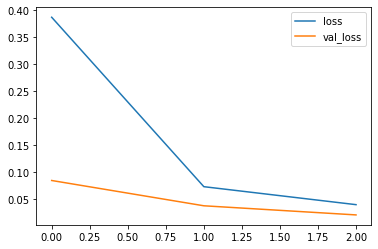

In [58]:
import pandas as pd
pd.DataFrame(history_5.history)[['loss', 'val_loss']].plot()

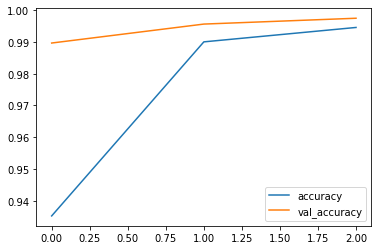

In [59]:
pd.DataFrame(history_5.history)[['accuracy', 'val_accuracy']].plot()

In [54]:
wandb.init(project="project_test_model_4")
model_4 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(10, 3, 1,
                           activation=tf.keras.activations.relu, 
                           input_shape=(200, 200, 3)), 
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, 1, 
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation=tf.keras.activations.relu), 
    tf.keras.layers.Dense(29), 
    tf.keras.layers.Activation(tf.keras.activations.softmax, dtype=tf.float32)
])
model_4.compile(
    loss="categorical_crossentropy", 
    metrics=["accuracy"], 
    optimizer=tf.keras.optimizers.Adam()
)
history_4 = model_4.fit(
    train_data, 
    epochs=3, 
    steps_per_epoch=len(train_data), 
    validation_data=test_data, 
    validation_steps=int(0.25 * len(test_data)), 
    callbacks=[WandbCallback()]
)

accuracy,▁▇█
epoch,▁▅█
loss,█▂▁
val_accuracy,▁▆█
val_loss,█▃▁
accuracy,0.99457
best_epoch,2
best_val_loss,0.01972
epoch,2
loss,0.03877
val_accuracy,0.99747


Epoch 1/3
2174/2175 [============================>.] - ETA: 0s - loss: 0.6598 - accuracy: 0.7946

wandb: Adding directory to artifact (/content/wandb/run-20230123_021006-nwy8kt67/files/model-best)... Done. 1.4s


2175/2175 [==============================] - 82s 37ms/step - loss: 0.6596 - accuracy: 0.7947 - val_loss: 0.1713 - val_accuracy: 0.9453
Epoch 2/3
2174/2175 [============================>.] - ETA: 0s - loss: 0.0954 - accuracy: 0.9683

wandb: Adding directory to artifact (/content/wandb/run-20230123_021006-nwy8kt67/files/model-best)... Done. 1.4s


2175/2175 [==============================] - 89s 41ms/step - loss: 0.0954 - accuracy: 0.9683 - val_loss: 0.1085 - val_accuracy: 0.9651
Epoch 3/3
2175/2175 [==============================] - ETA: 0s - loss: 0.0587 - accuracy: 0.9817

wandb: Adding directory to artifact (/content/wandb/run-20230123_021006-nwy8kt67/files/model-best)... Done. 1.4s


2175/2175 [==============================] - 91s 41ms/step - loss: 0.0587 - accuracy: 0.9817 - val_loss: 0.0931 - val_accuracy: 0.9750


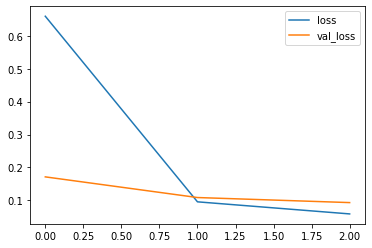

In [60]:
pd.DataFrame(history_4.history)[['loss', 'val_loss']].plot()

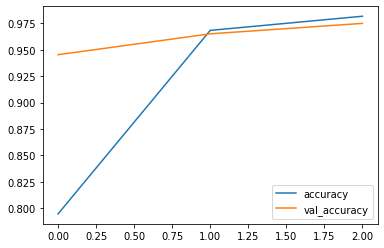

In [61]:
pd.DataFrame(history_4.history)[['accuracy', 'val_accuracy']].plot()